In [27]:
import os
import sys
topFolder = os.getcwd().split('\\').pop(-1)
moduleDirectory = os.getcwd()[:-len(topFolder)]
sys.path.append(moduleDirectory)

from reporting import *
%matplotlib inline
import matplotlib.pyplot as plt

path = r'C:\Users\ucqba01\Documents\Local Data\Round 6'
dbGeneric = 'hR_m_2002_waves(waves)_RPS(rps)_fcost(fcost)_newfuelcost.db'

def makedbName(dbgeneric,labelDict):
    dbstring = dbgeneric
    for param in labelDict.keys():
        dbstring = dbstring.replace(param,str(labelDict[param]))
    return dbstring

testdb = makedbName(dbGeneric,{'(rps)':'90','(waves)':'10000','(fcost)':'120'})
vrelist = ['Solar','Windonshore','Windoffshore_Shallow','Windoffshore_Mid','Windoffshore_Floating']

fcost=[80,100,120,140]
waves=[400,10000]
RPS = [20,40,60,80,90]
columnList = ['vre_total','residual_load_vre']
paramsList = ['fcost','waves','rps','metric']

metrics = ['mean','std','min','max','50%']
statisticalValues = pd.DataFrame(columns=paramsList+columnList,index=np.arange(len(fcost)*len(waves)*len(RPS)*len(metrics)))
i=0
for fc in fcost:
    for w in waves:
        for rps in RPS:
            db = makedbName(dbGeneric,{'(rps)':str(rps),'(waves)':str(w),'(fcost)':str(fc)})
            con = sq.connect(path+'\\'+db)
            gen_sum_h = mergeGEN('var_vre_gen_sum_h','var_non_vre_gen_sum_h',con).set_index('h').pivot(columns='gen').xs('value',axis=1,drop_level=True)
            gen_sum_h['vre_total'] = gen_sum_h[vrelist].sum(axis=1)
            demand = get('demand',con).set_index('h').pivot(columns='z').sum(axis=1)
            gen_sum_h['demand'] = demand
            gen_sum_h['residual_load_vre'] = gen_sum_h['demand']-gen_sum_h['vre_total']
            data = gen_sum_h.describe()
            for met in metrics:
                metData = data.loc[met][columnList]
                paramseries = pd.Series(index=paramsList,data=[fc,w,rps,met])
                statisticalValues.loc[i]=paramseries.append(metData)
                i=i+1
            #print(statisticalValues)

statisticalValues

,fcost,waves,rps,metric,vre_total,residual_load_vre
0,80,400,20,mean,12313.2,45157.1
1,80,400,20,std,5866.34,10574.3
2,80,400,20,min,235.268,29154.2
3,80,400,20,max,24914.5,86646.7
4,80,400,20,50%,12376.2,44384.3
5,80,400,40,mean,24030.3,33440.1
6,80,400,40,std,8644.59,10544.1
7,80,400,40,min,3159.79,16395.9
8,80,400,40,max,43356.8,80072.6
9,80,400,40,50%,24024.3,31779.6


In [28]:
#convert from MW to GW
statisticalValues.loc[:,['vre_total','residual_load_vre']] *= 0.001
statisticalValues

,fcost,waves,rps,metric,vre_total,residual_load_vre
0,80,400,20,mean,12.3132,45.1571
1,80,400,20,std,5.86634,10.5743
2,80,400,20,min,0.235268,29.1542
3,80,400,20,max,24.9145,86.6467
4,80,400,20,50%,12.3762,44.3843
5,80,400,40,mean,24.0303,33.4401
6,80,400,40,std,8.64459,10.5441
7,80,400,40,min,3.15979,16.3959
8,80,400,40,max,43.3568,80.0726
9,80,400,40,50%,24.0243,31.7796


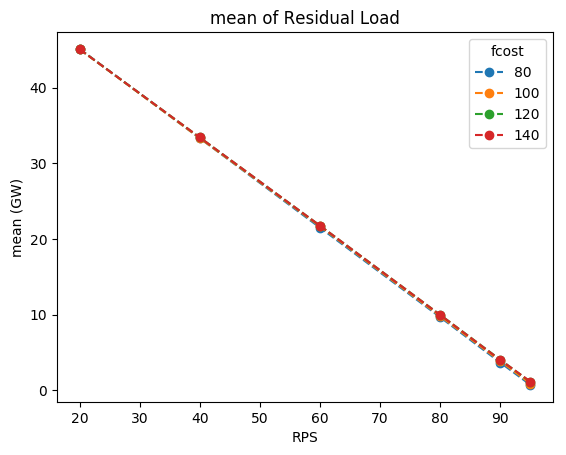

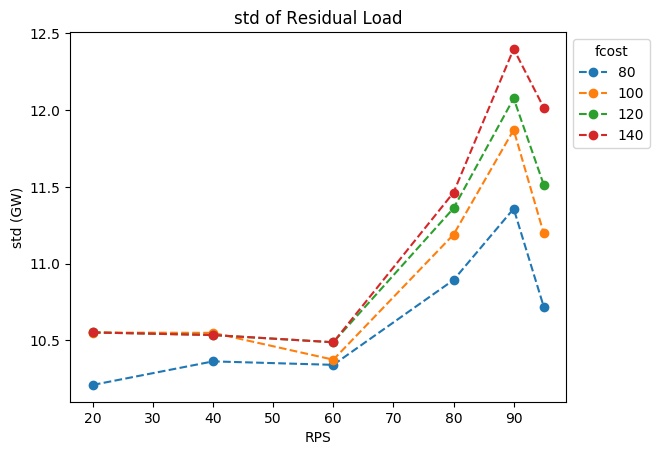

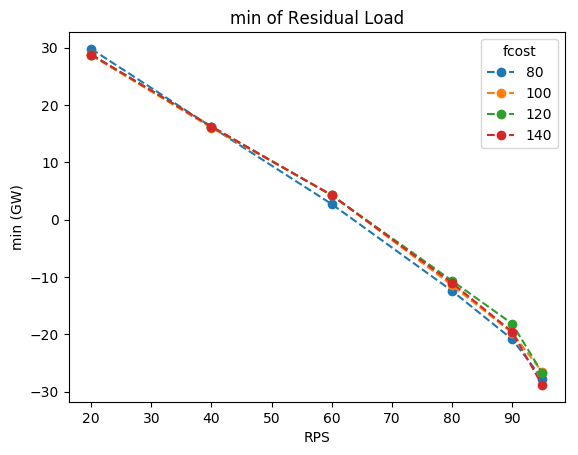

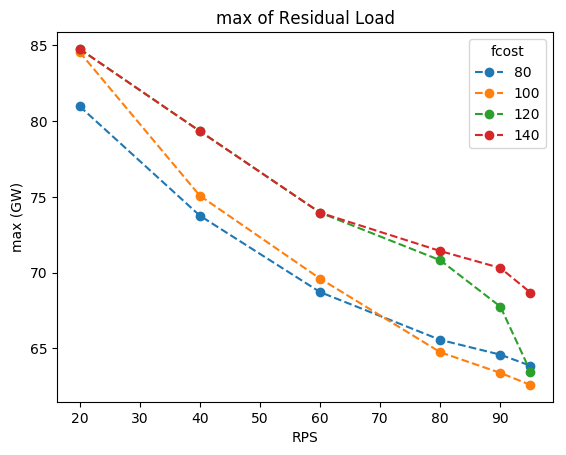

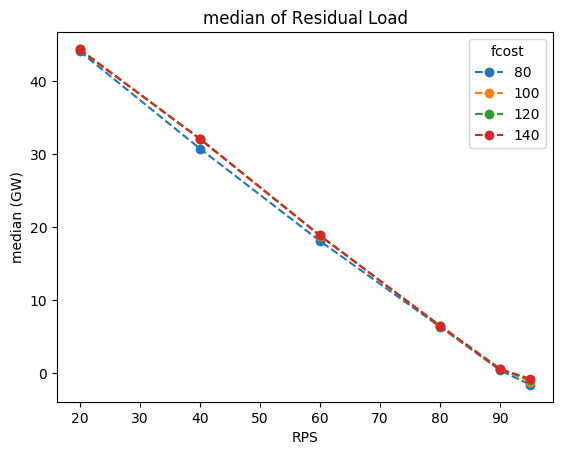

residual loads do not consider storage


In [26]:
columnList='residual_load_vre'
for m in metrics:
    #sns.set_palette(sns.hls_palette(8,l=0.4,s=0.9))
    sns.reset_defaults()
    plotdf = statisticalValues[(statisticalValues['metric']==m) & (statisticalValues['waves']==10000)].set_index('rps').pivot(columns='fcost')[columnList]
    if m == '50%':
        m='median'
    plotdf.plot(title = '%s of Residual Load'%m,linestyle='--',marker='o').legend(title = 'fcost',bbox_to_anchor=(1,1))
    plt.ylim(ymin=0)
    plt.xlabel('RPS')
    plt.ylabel('%s (GW)'%m)
    plt.autoscale()
    outFile = r'C:\Users\ucqba01\Google Drive\Extended Research\Writing\Images\%s_residuals_no95.png'%m
    plt.savefig(outFile,dpi=900,bbox_inches='tight')
    plt.show()
    
print('residual loads do not consider storage')

fcost     C100     C120     C140      C80
rps                                      
20     10.5498  10.5505  10.5505  10.2082
40     10.5478  10.5335  10.5335  10.3618
60     10.3728  10.4864  10.4864  10.3391
80     11.1887  11.3603  11.4629  10.8925
90     11.8715  12.0767  12.3993  11.3575


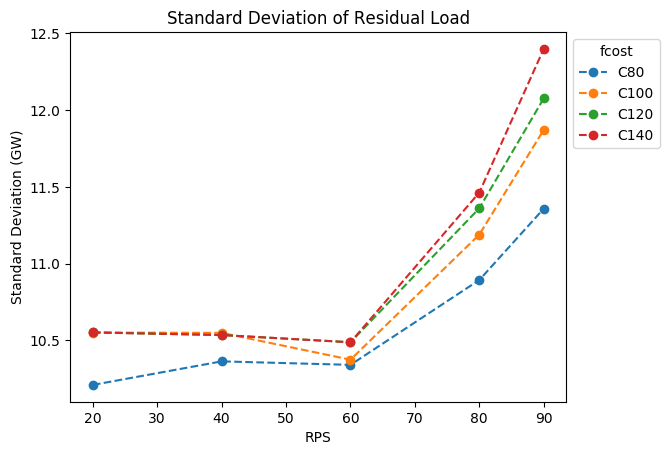

residual loads do not consider storage


In [30]:
columnList='residual_load_vre'
m='std'
#sns.set_palette(sns.hls_palette(8,l=0.4,s=0.9))
sns.reset_defaults()

plotdata = statisticalValues[(statisticalValues['metric']==m) & (statisticalValues['waves']==10000)].set_index('rps')
plotdata['fcost']='C'+plotdata['fcost'].astype('str')
plotdf = plotdata.pivot(columns='fcost')[columnList]

print(plotdf)

plotdf[['C80','C100','C120','C140']].plot(title = 'Standard Deviation of Residual Load',linestyle='--',marker='o').legend(title = 'fcost',bbox_to_anchor=(1,1))
plt.ylim(ymin=0)
plt.xlabel('RPS')
plt.ylabel('Standard Deviation (GW)')
plt.autoscale()

outFile = r'C:\Users\ucqba01\Google Drive\Extended Research\Writing\Images\stdev_residuals_no95.png'

plt.savefig(outFile,dpi=900,bbox_inches='tight')
plt.show()
    
print('residual loads do not consider storage')